<a href="https://colab.research.google.com/github/gabrieleantonini00/Time-Series-Analysis/blob/main/GBBNZD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install PythonTsa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 7.6 MB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from PythonTsa.plot_acf_pacf import acf_pacf_fig

/tmp/ipython-input-879055001.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range('1991', periods = len(x), freq = 'Q')


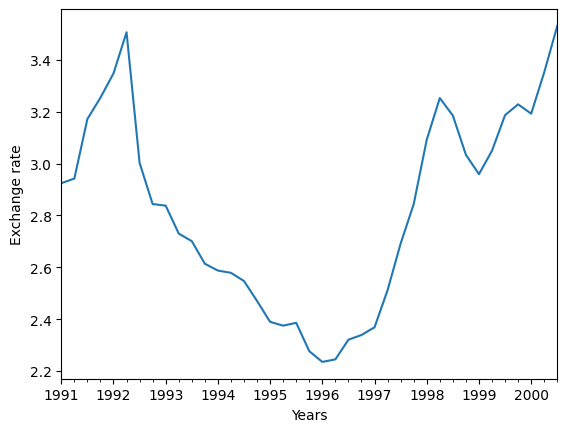

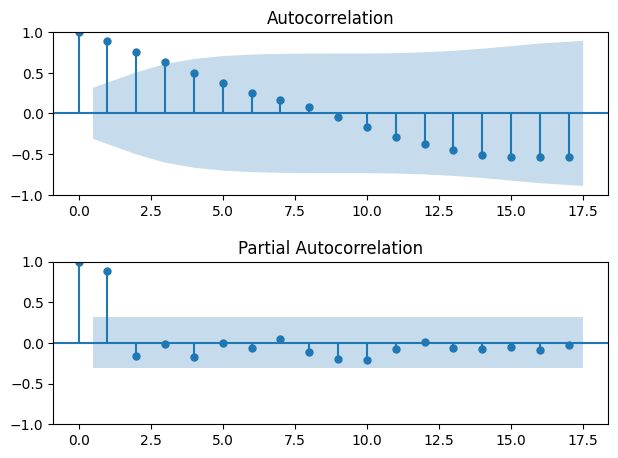

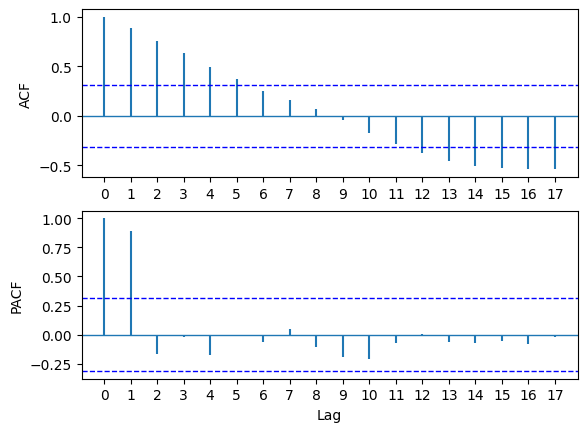

In [7]:
x = pd.read_table('ExchRate NZ per UK.txt', header=0)
dates = pd.date_range('1991', periods = len(x), freq = 'Q')
x.index = dates; xts = pd.Series(x['xrate'])
xts.plot(); plt.xlabel('Years')
plt.ylabel('Exchange rate');
plt.savefig('pyTSA_ExRate_fig2-1.png', dpi = 1200,
             bbox_inches ='tight', transparent = True);
# The following is to plot ACF and PACF using statsmodels
fig = plt.figure()
plot_acf(xts, lags = 17, ax = fig.add_subplot(2, 1, 1))
plot_pacf(xts, lags = 17, ax = fig.add_subplot(2, 1, 2))
fig.tight_layout(pad = 1.5);
plt.savefig('pyTSA_ExRate_fig2-2.png', dpi = 1200,
             bbox_inches ='tight', transparent = True);
# The following is to plot ACF and PACF using PythonTsa
acf_pacf_fig(xts, both = True, lag = 17)
plt.savefig('pyTSA_ExRate_fig2-3.png', dpi = 1200,
             bbox_inches ='tight', transparent = True);

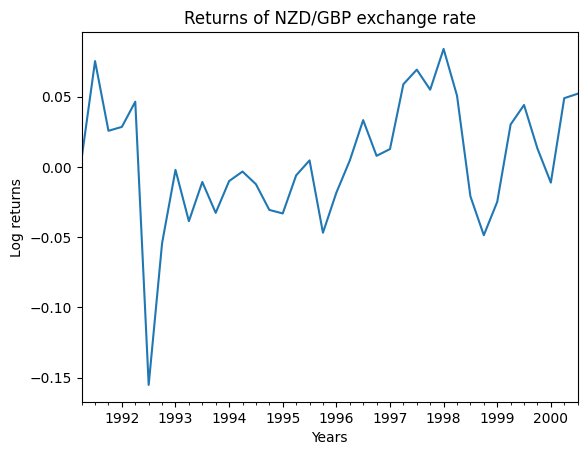

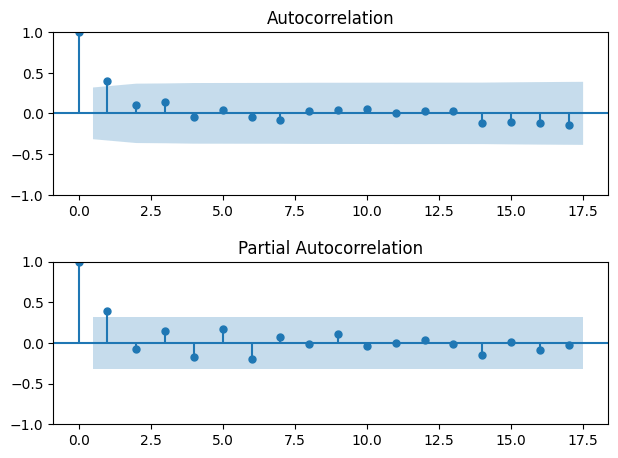

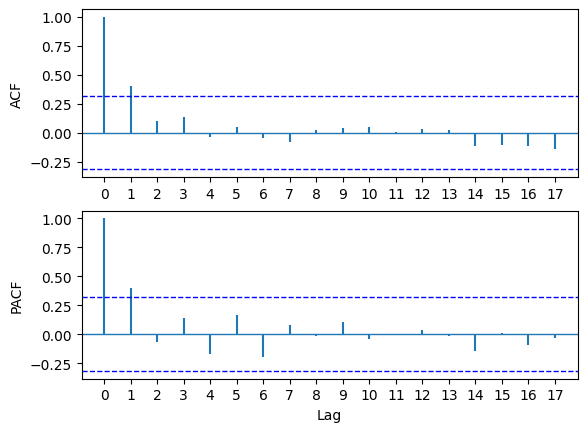

In [9]:
import numpy as np

# Returns (log differences) of the exchange rate
log_xts = np.log(xts)
returns = log_xts.diff().dropna()   # log-returns

# Plot returns
returns.plot()
plt.xlabel('Years')
plt.ylabel('Log returns')
plt.title('Returns of NZD/GBP exchange rate')
plt.savefig('pyTSA_ExRate_returns.png', dpi=1200,
             bbox_inches='tight', transparent=True)
plt.show()

# ACF and PACF with statsmodels
fig = plt.figure()
plot_acf(returns, lags=17, ax=fig.add_subplot(2, 1, 1))
plot_pacf(returns, lags=17, ax=fig.add_subplot(2, 1, 2))
fig.tight_layout(pad=1.5)
plt.savefig('pyTSA_ExRate_returns_statsmodels.png', dpi=1200,
             bbox_inches='tight', transparent=True)
plt.show()

# ACF and PACF with PythonTsa
acf_pacf_fig(returns, both=True, lag=17)
plt.savefig('pyTSA_ExRate_returns_PythonTsa.png', dpi=1200,
             bbox_inches='tight', transparent=True)
plt.show()